In [1]:
print("Hello World")

Hello World


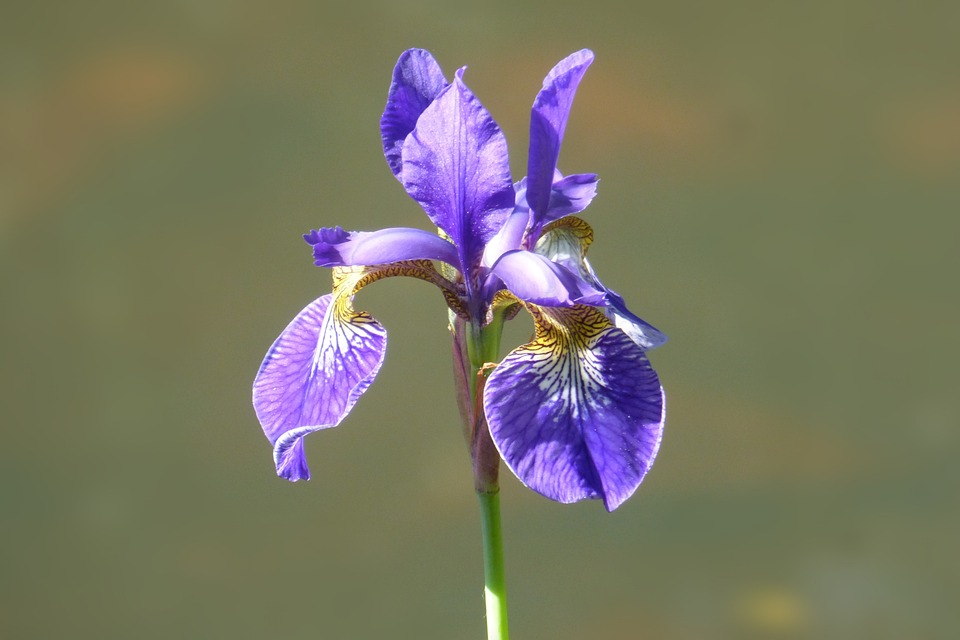

This notebook is aimed at trying to classify between three Iris flower species using data analysis methods for visualization and various machine learning algorithms.

# Uploading and Analyzing Iris Data:

Necessary Imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from collections import Counter


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


Reading Iris data:

In [2]:

data=pd.read_csv('/kaggle/input/iris/Iris.csv')


data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
print("The count of null values in every feature:")
print(data.isnull().sum())

print("The 3 unique species we want to calssify:")
print(data['Species'].unique())

The count of null values in every feature:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
The 3 unique species we want to calssify:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
class_counts = data['Species'].value_counts()
print("\nNumber of data points for each class:")
class_counts


Number of data points for each class:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

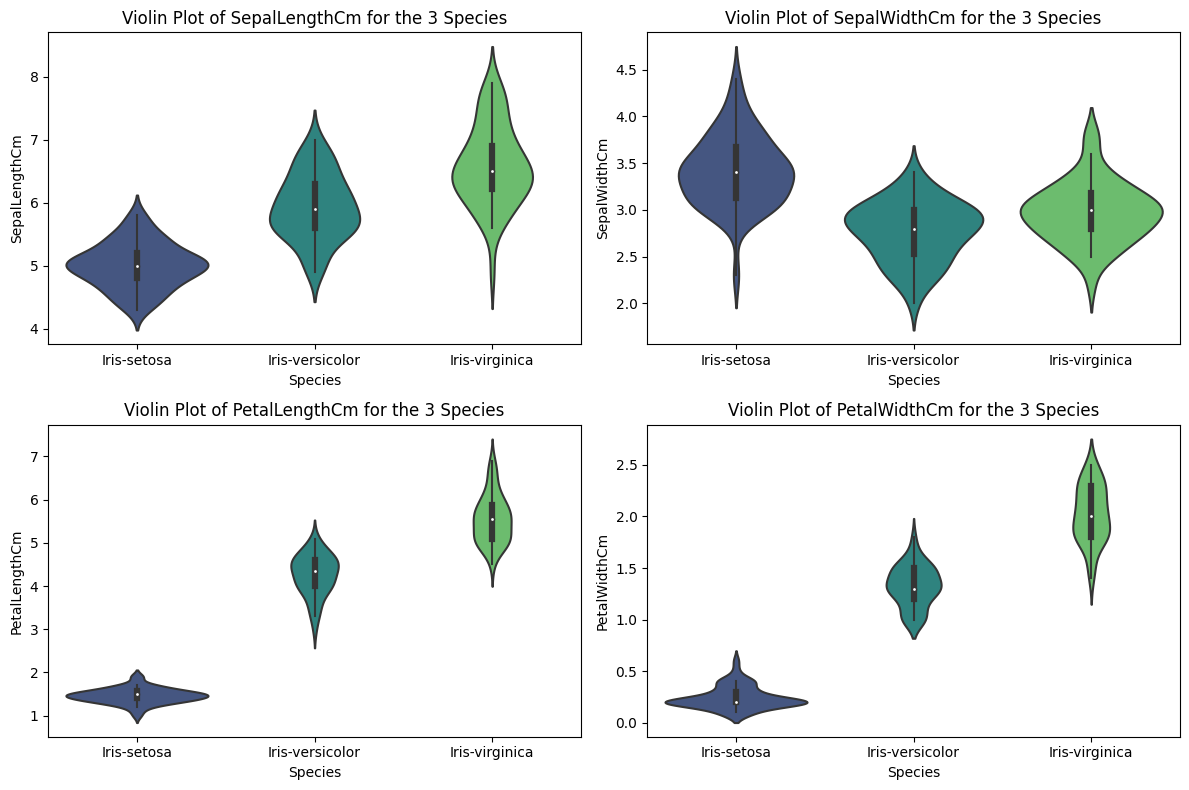

In [7]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(12, 8)) 

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1) 
    sns.violinplot(x='Species', y=feature, data=data, palette="viridis") 
    plt.title(f'Violin Plot of {feature} for the 3 Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
   


plt.tight_layout() 
plt.show()

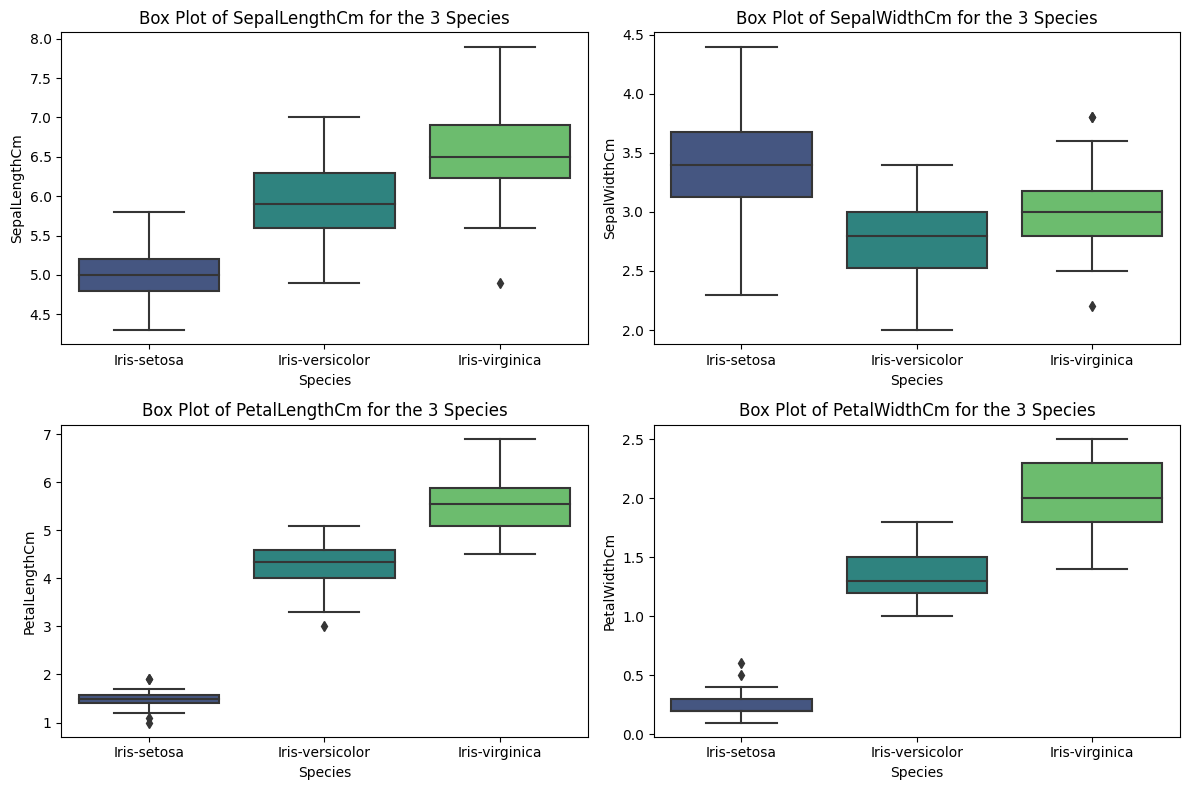

In [8]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=data, palette="viridis")
    plt.title(f'Box Plot of {feature} for the 3 Species')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

We'll be observing the effects these outliers will have on the accuracy of our models, and as evidenced by the confusion matrices.

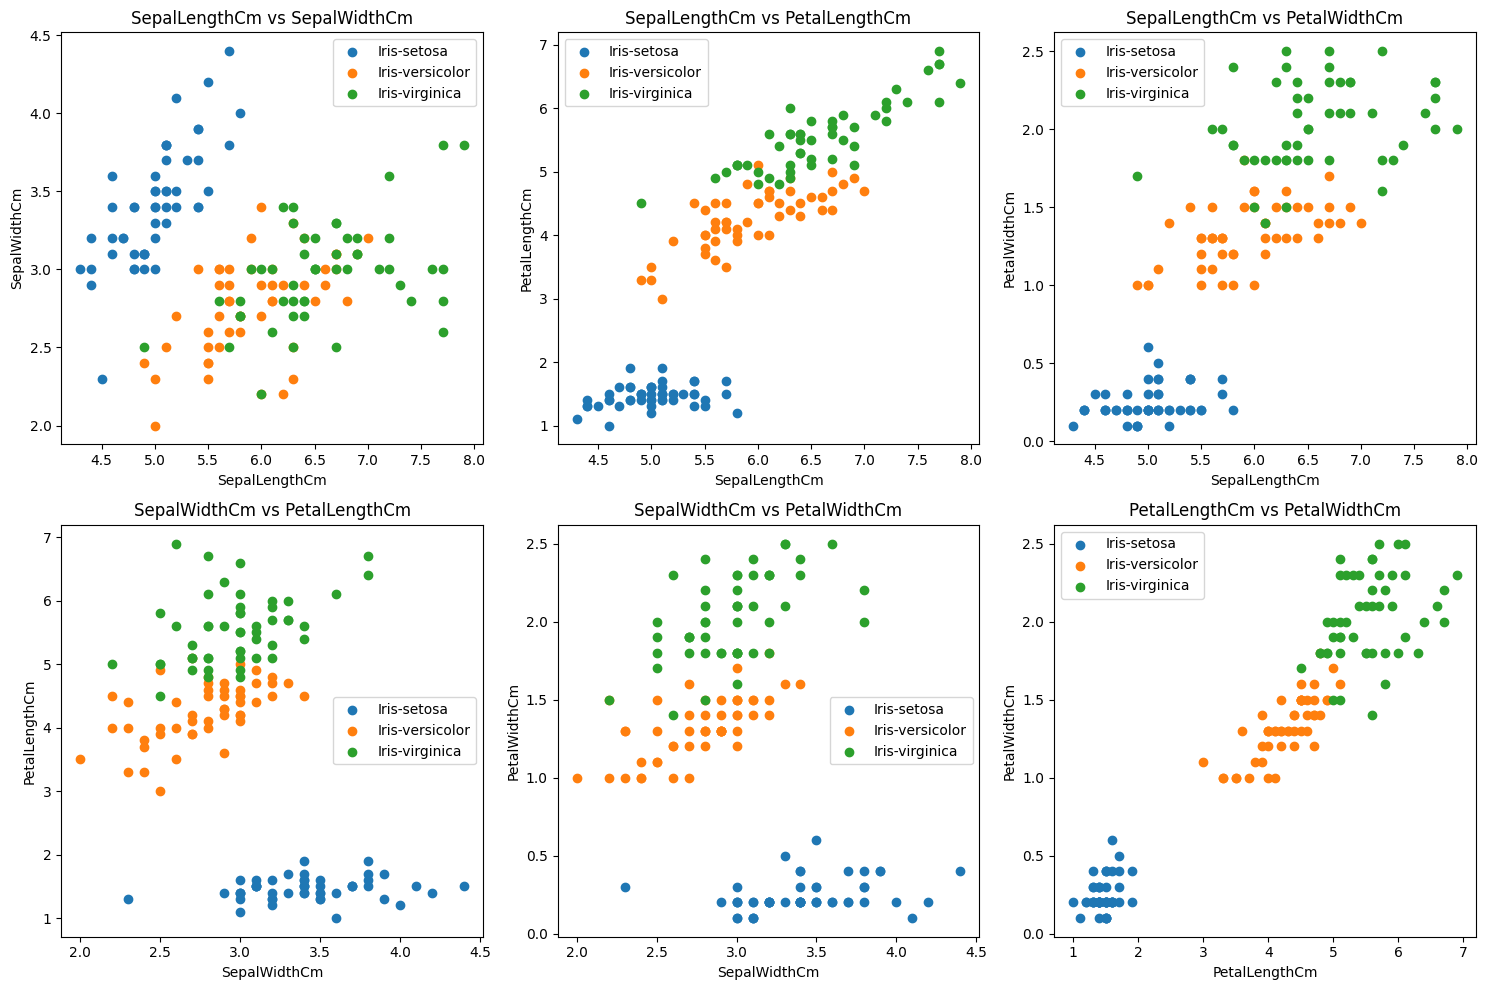

In [9]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
species = data['Species'].unique()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))  


n = 0  
for i in range(4):
    for j in range(i + 1, 4):
        row = n // 3  
        col = n % 3  
        ax = axes[row, col]  

        for spec in species:
            temp_data = data[data['Species'] == spec]
            ax.scatter(temp_data[features[i]], temp_data[features[j]], label=spec)

        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
        ax.set_title(f'{features[i]} vs {features[j]}')
        ax.legend()

        n += 1  
        
plt.tight_layout()
plt.show()

Using Random Forests Classifier to calculate feature importances:

Feature: SepalLengthCm, Importance: 0.0956217657882459
Feature: SepalWidthCm, Importance: 0.020500972878343186
Feature: PetalLengthCm, Importance: 0.40166677730882877
Feature: PetalWidthCm, Importance: 0.482210484024582


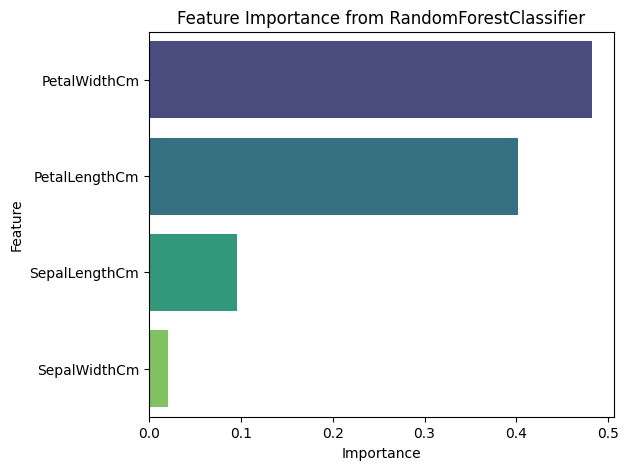

In [10]:
X = data[features]
y = data['Species']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

for feature, importance in zip(features, importances):
    print(f'Feature: {feature}, Importance: {importance}')

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance from RandomForestClassifier')
plt.show()

Visualizing correlations between features using correlation matrix:

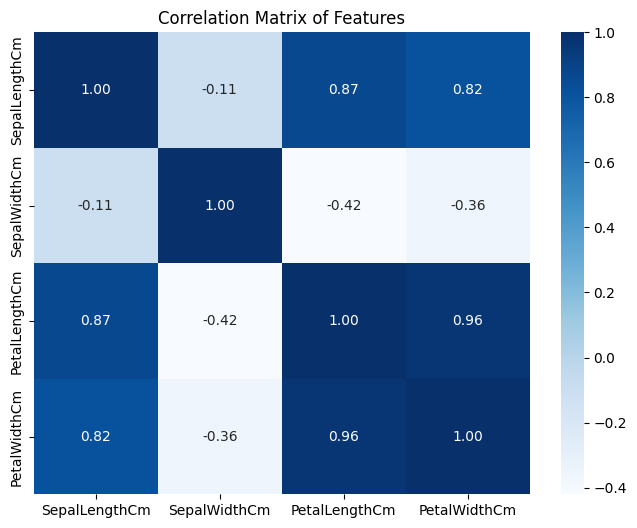

In [11]:
correlation_matrix = data[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Let's split our dataset into training, validating, and testing set:

In [12]:
X = data[features]
y = data['Species']

# Split data into training and temporary sets (80% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# Split the temporary set into testing and validation sets (50% test, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

Training data shape: (105, 4) (105,)
Testing data shape: (22, 4) (22,)
Validation data shape: (23, 4) (23,)


Now let's experiment with different machine learning algorithms and check the one that would best predict our Iris species:

Note: We are experinmenting with different models without the use of data preprocessing methods.

# Classification using K-Nearest Neighbor Algorithm

In [13]:
k_values = range(1, 31) # Testing k values from 1 to 30
best_k = 1
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k-value: {best_k}, Best accuracy on validation set: {best_accuracy}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train) # Train with the best k on the entire training set
y_pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Test Accuracy with best k: {test_accuracy}")

Best k-value: 1, Best accuracy on validation set: 1.0
Test Accuracy with best k: 1.0


To avoid overfitting due to the small size of the cross-validation sets, let's iterate the algorithm over different partitions of the original dataset and get the average best value of k:

In [14]:
avg_test_accuracy=0
avg_best_k=0
for i in range (300):
  
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

  X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)
 
  best_k = 1
  best_accuracy = 0

  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      y_pred_val = knn.predict(X_val)
      accuracy = accuracy_score(y_val, y_pred_val)
      if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_k = k

  
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train) 
  y_pred_test = knn.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred_test)
  avg_test_accuracy+=test_accuracy
  avg_best_k+=best_k

print(f"The average best k value is {avg_best_k/300} and the avg test accuracy is {avg_test_accuracy/300}")

The average best k value is 4.503333333333333 and the avg test accuracy is 0.9559090909090927


Hence, taking the 4-nearest neighbors is the best choice for our classification problem:

Cross-Validation Accuracies for Each Fold: [1.         0.93333333 1.         0.93333333 0.96666667]
Mean CV Accuracy: 0.9667, Standard Deviation: 0.0298
Test Accuracy for one set sample: 0.9778


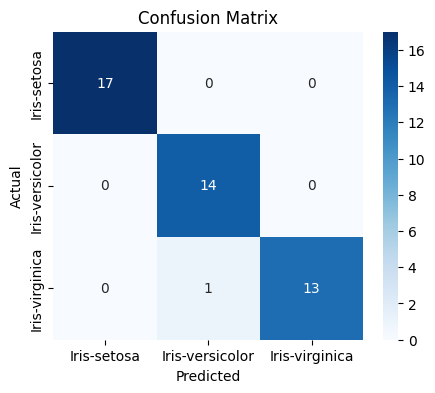

In [15]:
kf = KFold(n_splits=5, shuffle=True)  
knn = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracies for Each Fold:", cv_scores)

# Calculate and print mean and standard deviation of cross-validation accuracy
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f"Mean CV Accuracy: {mean_accuracy:.4f}, Standard Deviation: {std_accuracy:.4f}")

# Retrain model on the entire dataset for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy for one set sample: {test_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Now let's check the average accuracy when Logistic Regression Algorithm is used:

# Logistic Regression

The avg test accuracy is 0.9637777777777774
Confusion Matrix for one of the random samples:


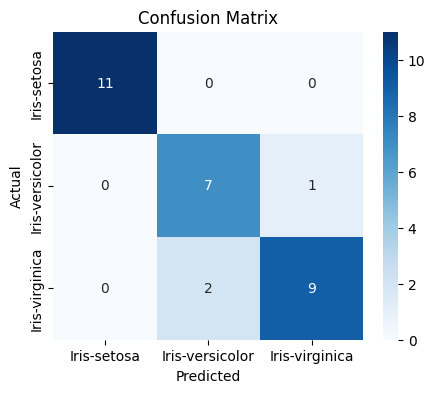

In [16]:
avg_test_accuracy=0
for i in range (300):
  # Splitting the data:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

  logreg = LogisticRegression(max_iter=1000) 
  logreg.fit(X_train, y_train)
  y_pred_test = logreg.predict(X_test)

  test_accuracy = accuracy_score(y_test, y_pred_test)
  avg_test_accuracy+=test_accuracy
print(f"The avg test accuracy is {avg_test_accuracy/300}")

print("Confusion Matrix for one of the random samples:")
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Decision Trees

First, let's choose the max_depth that would give us the highest test accuracy:

In [17]:
depths=range(1, 5)
best_depth = 0
Best_depth=[]

for i in range(200):
  best_accuracy=0
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 
  for d in depths:
      dt_classifier = DecisionTreeClassifier(max_depth=d, criterion='entropy')
      dt_classifier.fit(X_train, y_train)
      y_pred = dt_classifier.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_depth = d
  Best_depth.append(best_depth)       

counts = Counter(Best_depth)
most_common_number = counts.most_common(1)[0][0]
print(f"The best depth is: {most_common_number}")



The best depth is: 2


Getting our tree of depth=2:

Accuracy with depth 2: 0.9333333333333333


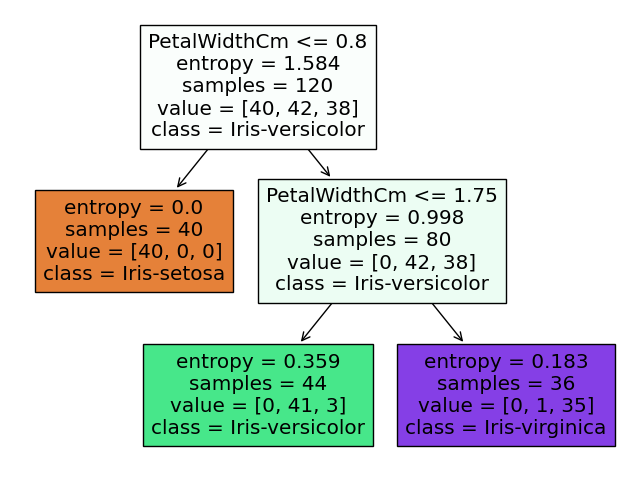

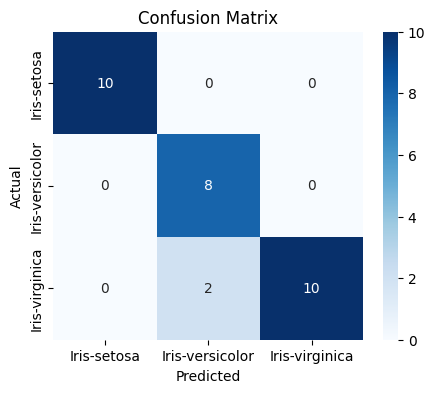

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
dt_classifier = DecisionTreeClassifier(max_depth=most_common_number, criterion='entropy')
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with depth {most_common_number}: {accuracy}")

# Plotting the decision tree:
plt.figure(figsize=(8, 6))
plot_tree(dt_classifier, feature_names=features, class_names=data['Species'].unique(), filled=True)
plt.show()
print("\n")
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Random Forests

The average accuracy of using Random Forests Classifier:

The avg accuracy is 0.9583333333333338


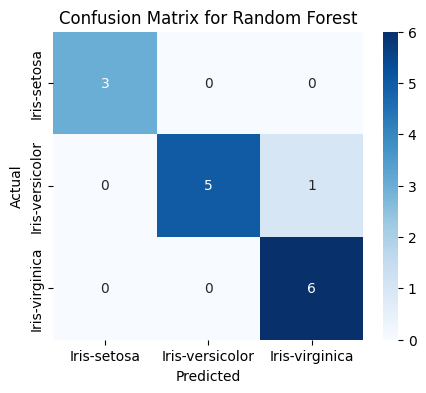

In [19]:
avg_accuracy=0
for i in range (200):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

  rf_classifier = RandomForestClassifier(random_state=42) 
  rf_classifier.fit(X_train, y_train)
  y_pred = rf_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  avg_accuracy+=accuracy
print(f"The avg accuracy is {avg_accuracy/200}")
 

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Bayesian Classifier

The avg accuracy is 0.9547777777777782
Confusion matrix of a random testing set:


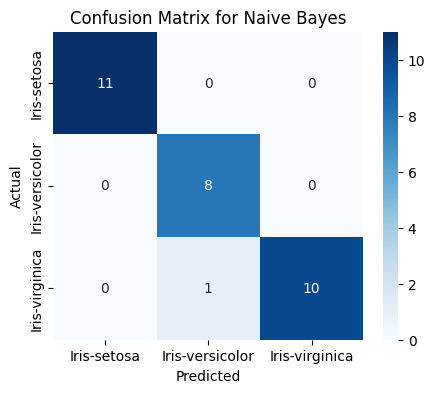

In [20]:
avg_accuracy=0
for i in range (300):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Applying Gaussian Naive Bayes
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  avg_accuracy+=accuracy
print(f"The avg accuracy is {avg_accuracy/300}")

print(f"Confusion matrix of a random testing set:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gnb.classes_, yticklabels=gnb.classes_) 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bayes") 
plt.show()

# Artificial Neural Networks

In [21]:
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Converting target to categorical:
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Defining the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=16, verbose=1)

# Evaluating the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converts probabilities to class labels
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Accuracy on test set: {accuracy:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3154 - loss: 1.5924
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3993 - loss: 1.2863 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4483 - loss: 1.1742 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5401 - loss: 1.0509 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4477 - loss: 1.0588 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5500 - loss: 0.9898 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7257 - loss: 0.9284 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 0.9053 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 0.8809 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7398 - loss: 0.8332 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7539 - loss: 0.7952 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.7611 
Ep

# Conclusion

Neural Networks gave us slightly better results on our Iris species classification task, but all our models are about nearly accurate. The errors that affected the accuracy scores of our models are most probably a result of outliers, which, in nature may be expressed as abnormalities in the flower. This problem can be solved by clipping the outliers to their limits.

# 